In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 216s 1us/step


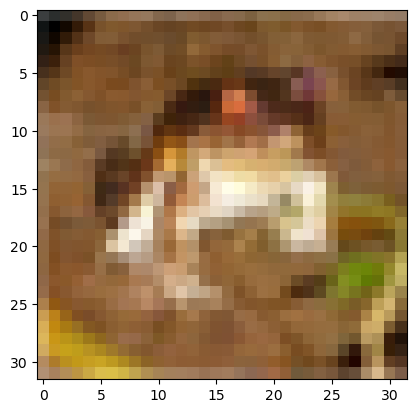

In [4]:
# FROG
plt.imshow(x_train[0])

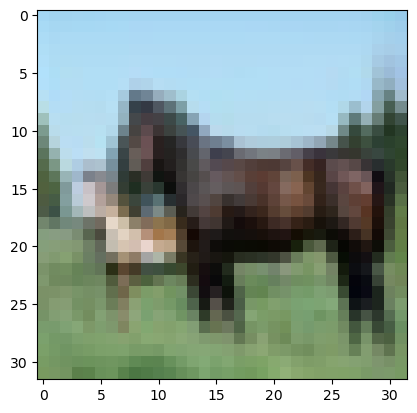

In [5]:
# HORSE
plt.imshow(x_train[12])

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 14s 4ms/step - loss: 1.5273 - accuracy: 0.4559 - val_loss: 1.3576 - val_accuracy: 0.5152
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1672 - accuracy: 0.5912 - val_loss: 1.2467 - val_accuracy: 0.5641
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0152 - accuracy: 0.6475 - val_loss: 1.0903 - val_accuracy: 0.6214
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9059 - accuracy: 0.6895 - val_loss: 0.9782 - val_accuracy: 0.6671
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8258 - accuracy: 0.7173 - val_loss: 1.0272 - val_accuracy: 0.6482
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7562 - accuracy: 0.7413 - val_loss: 0.9604 - val_accuracy: 0.6830
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7030 - accuracy: 0.7604 - val_loss: 0.9940 - val_accuracy

In [16]:
losses = pd.DataFrame(model.history.history)

In [17]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.527332,0.45588,1.357577,0.5152
1,1.167226,0.59118,1.246702,0.5641
2,1.015249,0.64754,1.090252,0.6214
3,0.905908,0.68946,0.978183,0.6671
4,0.825761,0.71728,1.027210,0.6482


<AxesSubplot:>

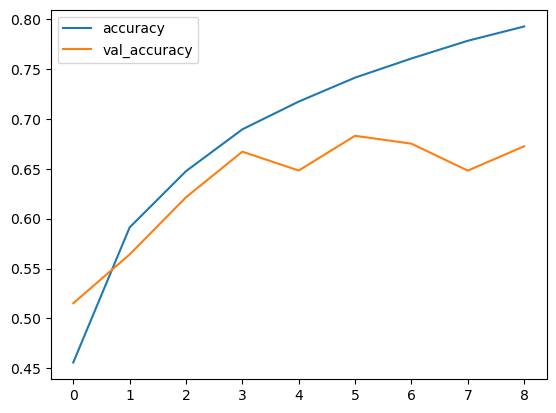

In [18]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

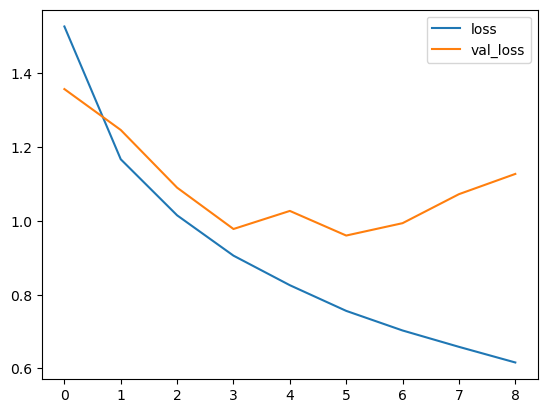

In [19]:
losses[['loss','val_loss']].plot()

In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1275086402893066, 0.6725000143051147]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [ ]:
my_image = x_test[16]

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html